# Decision Trees

Adapted from: https://scikit-learn.org/stable/modules/tree.html.

First, we import the necessary libraries:

In [1]:
import numpy as np
import pylab as pl

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

Next, we load the Iris flower dataset:

In [2]:
# Load data
iris = load_iris()

Now we run decision trees on each pair of features and plot the results:

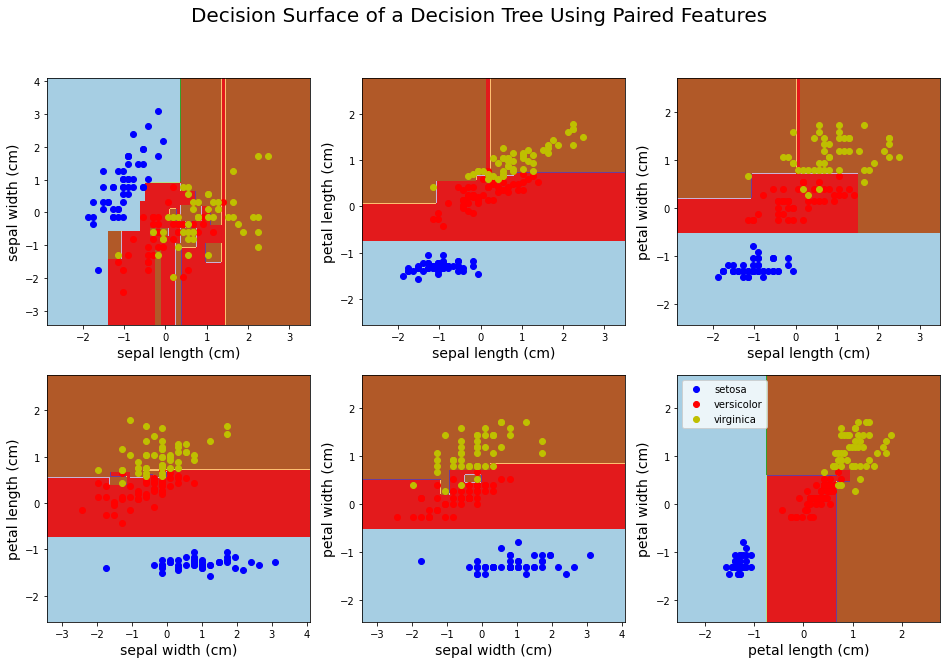

In [3]:
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

figure = pl.figure(figsize=(16, 10))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
     # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    pl.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = pl.contourf(xx, yy, Z, cmap=pl.cm.Paired)

    pl.xlabel(iris.feature_names[pair[0]], fontsize=14)
    pl.ylabel(iris.feature_names[pair[1]], fontsize=14)
    pl.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        pl.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                   cmap=pl.cm.Paired)

    pl.axis("tight")

pl.suptitle("Decision Surface of a Decision Tree Using Paired Features", fontsize=20)
pl.legend()
pl.show()